<a href="https://colab.research.google.com/github/Nram94/simulacion-modelacion-python/blob/main/Semana02_SimulacionEstatica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación Estática

---

# Producción de una Base de Crema 🧴
Considere un proceso en lotes de producciòn de una crema, como se representa en la siguiente Figura:
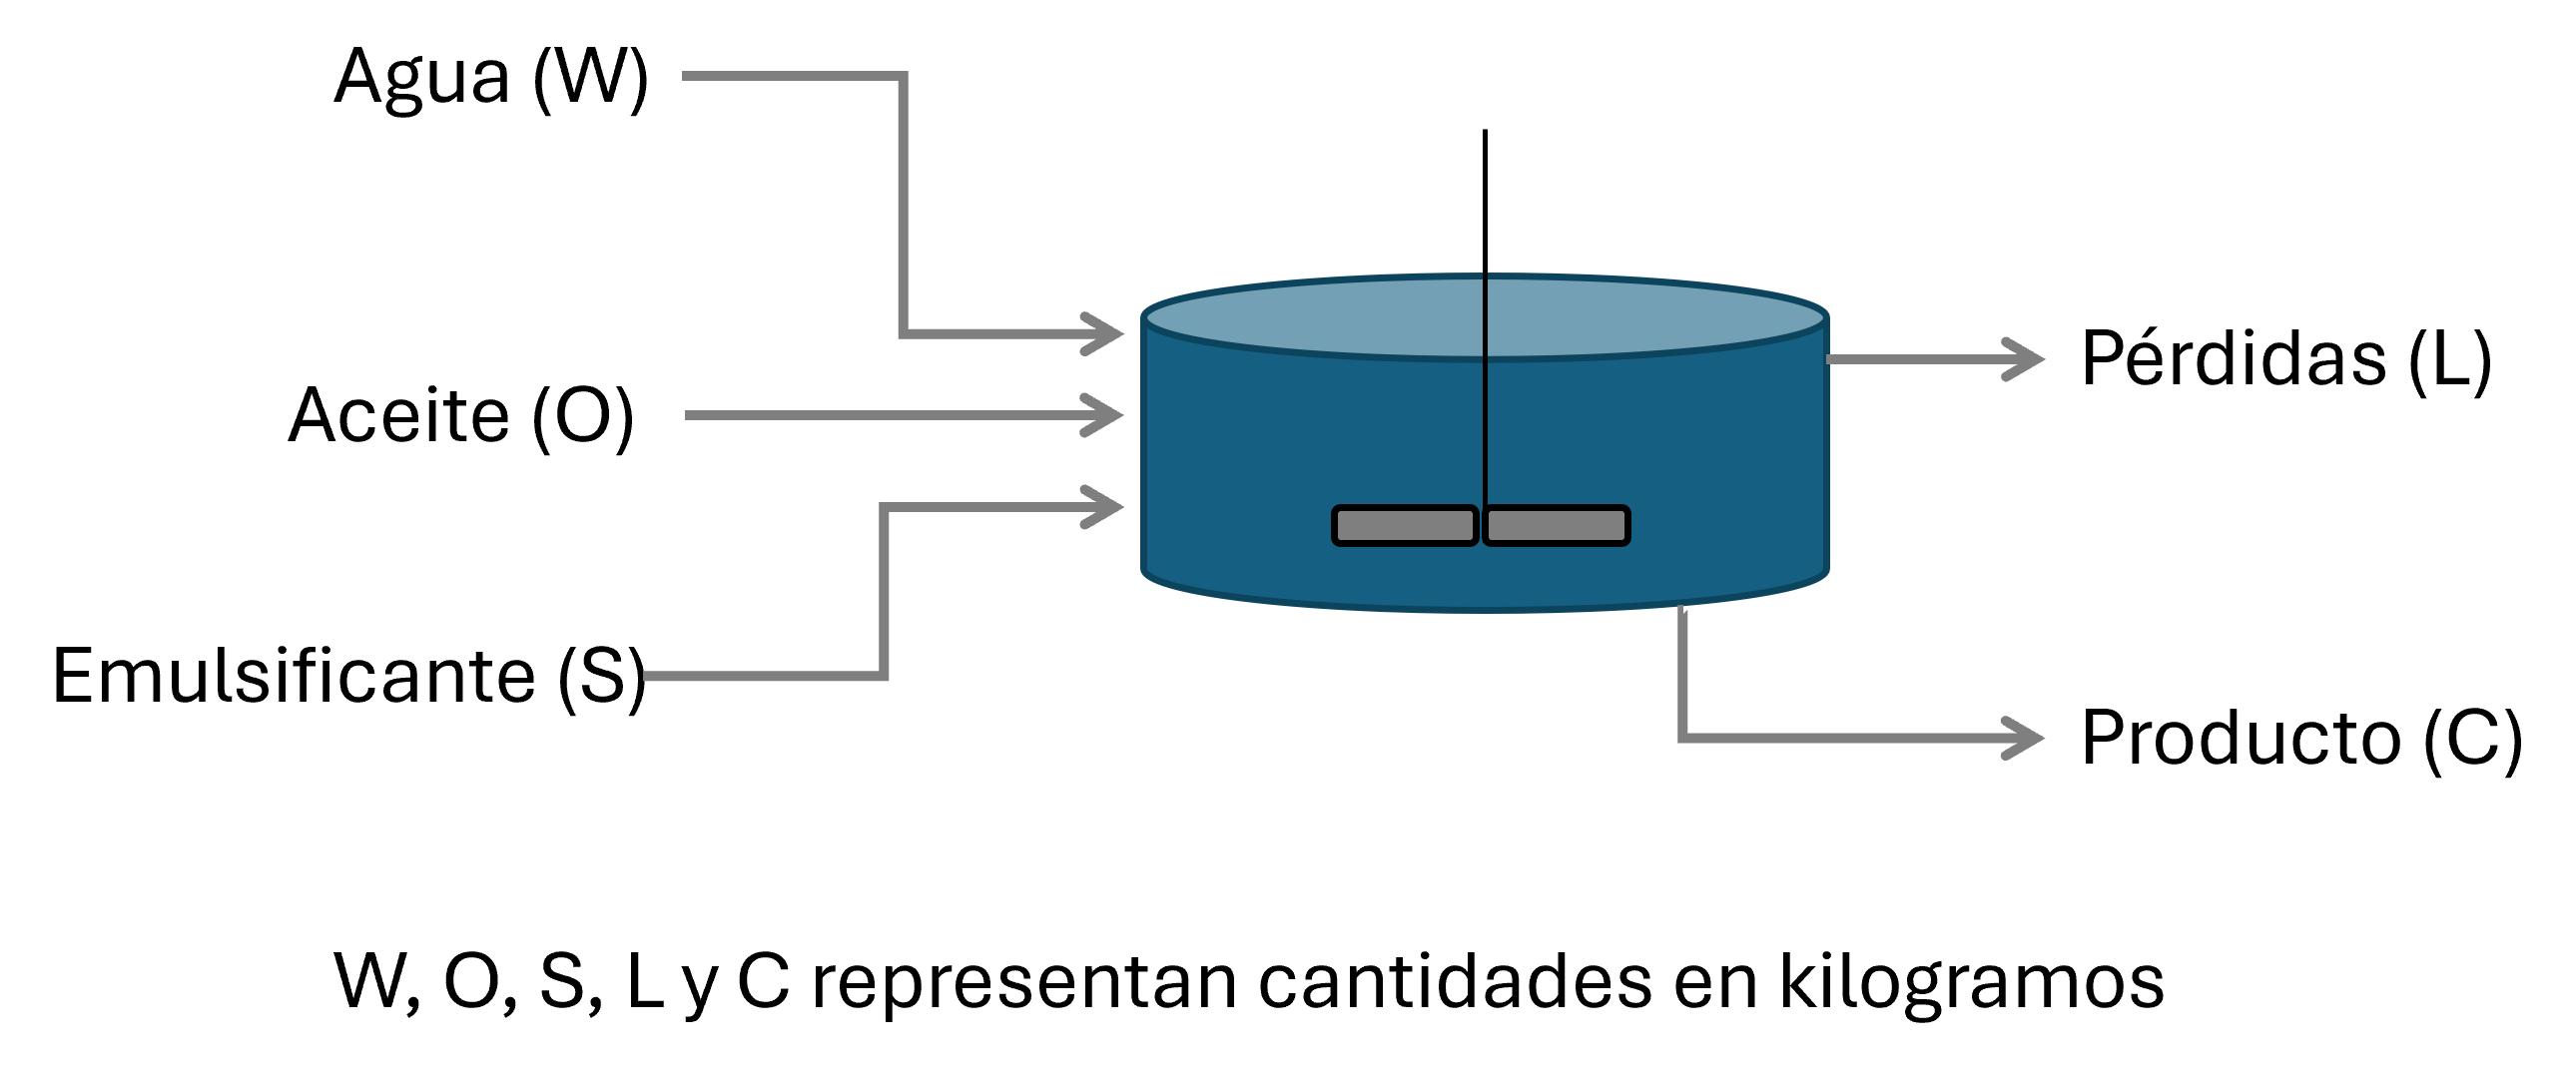

Si se desean obtener 100 kg de producto, hallar la cantidad de ingredientes (W, O y S) que se deben emplear en el proceso, sabiendo que las pérdidas usualmente son del 2%, el contenido de emulsificante debe ser 5% del contenido de agua, y la relación aceite/agua debe ser del 60%.

---


## Solución "Desde Cero" (Sustitución Secuencial - Teórico)
**Propósito**: Mostrar la lógica iterativa del método. No lo vamos a ejecutar a la perfección, sino a ilustrar su naturaleza iterativa.

**Método**: Usar un bucle for (que ya conocen) para simular las iteraciones.

In [ ]:
# Solución desde CERO: Sustitución Secuencial
# Ilustración de cómo se resolvería sin librerías avanzadas

W, L, S, O = 0.0,0.0, 0.0, 0.0  # Asumimos valores iniciales (suposición)
C = 100 # kg/h
# Simulamos 5 iteraciones para ver la convergencia
print("Iteración |    W    |    L    |    S    |    O    | |    error   | ")
print("---------------------------------------")

for i in range(1, 50):
    # Despejamos cada variable para ilustrar la secuencia (ejemplo simplificado)
    W_nuevo = L + C - S - O
    L_nuevo = 0.02*C / 0.98
    S_nuevo = 0.05*W
    O_nuevo = 0.6*W
    error = (W_nuevo - W) + (L_nuevo - L) + (S_nuevo - S) + (O_nuevo - O)
    # Actualizamos los valores
    W, L, S, O = W_nuevo, L_nuevo, S_nuevo, O_nuevo
    print(f"   {i}      | {W:.2f} | {L:.2f} | {S:.2f} | {O:.2f} || {error:.5f} |")

print("\nConclusión: Este método es laborioso y requiere muchas iteraciones.")

Iteración |    W    |    L    |    S    |    O    | |    error   | 
---------------------------------------
   1      | 100.00 | 2.04 | 0.00 | 0.00 || 102.04082 |
   2      | 102.04 | 2.04 | 5.00 | 60.00 || 67.04082 |
   3      | 37.04 | 2.04 | 5.10 | 61.22 || -63.67347 |
   4      | 35.71 | 2.04 | 1.85 | 22.22 || -43.57653 |
   5      | 77.96 | 2.04 | 1.79 | 21.43 || 41.38776 |
   6      | 78.83 | 2.04 | 3.90 | 46.78 || 28.32474 |
   7      | 51.36 | 2.04 | 3.94 | 47.30 || -26.90204 |
   8      | 50.80 | 2.04 | 2.57 | 30.82 || -18.41108 |
   9      | 68.65 | 2.04 | 2.54 | 30.48 || 17.48633 |
   10      | 69.02 | 2.04 | 3.43 | 41.19 || 11.96720 |
   11      | 57.42 | 2.04 | 3.45 | 41.41 || -11.36611 |
   12      | 57.18 | 2.04 | 2.87 | 34.45 || -7.77868 |
   13      | 64.72 | 2.04 | 2.86 | 34.31 || 7.38797 |
   14      | 64.87 | 2.04 | 3.24 | 38.83 || 5.05614 |
   15      | 59.97 | 2.04 | 3.24 | 38.92 || -4.80218 |
   16      | 59.87 | 2.04 | 3.00 | 35.98 || -3.28649 |
   17      | 63.

## Solución con el Poder de NumPy (Solución Matricial)
**Propósito**: Mostrar la forma eficiente y estándar de resolver sistemas lineales en ingeniería.

**Función clave**: np.linalg.solve()

In [ ]:
import numpy as np

# 0. Aplicar las relaciones entre L y C
C = 100 # kg/h
L = 0.02 * C /0.98
# 1. Definir la matriz de coeficientes A (el lado izquierdo de las ecuaciones)
# Las variables son W
A = np.array([
    [1.0, 1.0, 1.0], # W + S + O
    [-0.05, 1.0, 0.0], # -0.05W + S
    [-0.6, 0.0, 1.0]  # -0.6W + O
])

# 2. Definir el vector de resultados b (el lado derecho)
b = np.array([L + C, 0.0, 0.0])

# 3. ¡SOLUCIÓN INSTANTÁNEA con NumPy!
# Usamos np.linalg.solve(A, b)
solucion = np.linalg.solve(A, b)

# El vector 'solucion' contiene [W, S, O]
W_sol, S_sol, O_sol = solucion

print("--- Solución Matemática Directa (NumPy) ---")
print(f"Flujo de la Corriente W (kg/h): {W_sol:.2f}")
print(f"Flujo de la Corriente S (kg/h): {S_sol:.2f}")
print(f"Flujo de la Corriente O (kg/h): {O_sol:.2f}")
print(f"Flujo de la Corriente L (kg/h): {L:.2f}")

--- Solución Matemática Directa (NumPy) ---
Flujo de la Corriente W (kg/h): 61.84
Flujo de la Corriente S (kg/h): 3.09
Flujo de la Corriente O (kg/h): 37.11
Flujo de la Corriente L (kg/h): 2.04


## Optimziacióm extensiones a Problemas No Lineales con SciPy - Optimización
**Propósito**: Introducir el concepto de que la mayoría de los modelos reales (como los de equilibrio químico o termodinámico) son no lineales, y presentar la herramienta para resolverlos.

**Librería nueva**: SciPy

**Funciones clave**: optimize.root() y optimize.minimize()

### optimize.root()

**Caso de uso:** Si conocemos la derivada analìtica de nuestra función, este método es más rápido y preciso.

In [ ]:
from scipy.optimize import root


# 1. Definamos la función a la cual hallaremos la raiz
def deriv_tiempo_proceso(W): # Potencia de proceso (W)
  # 1.1 Declaramos parámetros Q y W_0
  Q = 1000 # kW, Calor de proceso
  W_0 = 400 # kW, Parámtero de eficiencia

  termino1 = 1 / (2.0*(W_0**1.5)*(W**0.5))
  termino2 = 1 / W**2
  dt_dW = Q*(termino1 - termino2)

  return dt_dW

# 2. Preparar optimziación
# scipy.optimize.root() requiere de un valor inicial para hallar la raíz
W_inicial = 300 # kW

# 3. Lanzamos optimización
resultado = root(
    deriv_tiempo_proceso, # Función a la cual hallaremos la raìz
    W_inicial,      # Valor inicial de variable respuesta
)

# 4. Presentamos resultados de optimziación
W_opt = resultado.x[0] # Esto es una lista y el primer elemento es la vble repsuesta
# ¡Extra! Calculamos el tiempo óptimo con la potencia óptima
t_opt = (Q/W_opt) * (1 + (W_opt/W_0)**1.5)

print("--- Resultado de la Optimización de Potencia ---")
print(f"Estado de la Optimización: {'Éxito' if resultado.success else 'Fallo'}")
print("-" * 40)
print(f"Potencia óptima: {W_opt} kW")
print(f"Tiempo de Proceso Óptimo: {t_opt:.2f} h")
print("-" * 40)
print("¡Hemos encontrado la potencia que minimiza el tiempo de proceso")

--- Resultado de la Optimización de Potencia ---
Estado de la Optimización: Éxito
----------------------------------------
Potencia óptima: 634.9604207872798 kW
Tiempo de Proceso Óptimo: 4.72 h
----------------------------------------
¡Hemos encontrado la potencia que minimiza el tiempo de proceso


### optimize.minimize()

**Caso de uso:** cuando la derivada analítica es desconocida o difícil de conocer podemos usar el solver de Scipy minimize() para calcularla.

In [ ]:
from scipy.optimize import minimize
import numpy as np

# 1. Definimos la función a minimizar
def tiempo_proceso(W): # Potencia de proceso W
  # 1.1 Declaramos Q y W_0
  Q = 1000 # kW, Calor de proceso
  W_0 = 400 # kW, Parámtero de eficiencia
  termino_raiz = (W/W_0)**1.5
  t = (Q/W)*(1 + termino_raiz)

  return t

# 2. Preparar optimziación
# scipy.optimize.root() requiere de un valor inicial para hallar la raíz
W_inicial = 300 # kW

# Definimos límites para la variable repsuesta W, la cual no puede ser 0.0
limites = [(0.1, None)] # W >= 0.1


# 3. Lanzamos optimización
resultado = minimize(
    tiempo_proceso, # Función a la cual hallaremos la raìz
    W_inicial,      # Valor inicial de variable respuesta
    bounds=limites  # Limites para la variable de respuesta
)

# 4. Presentamos resultados de optimziación
W_opt = resultado.x[0] # Esto es una lista y el primer elemento es la vble repsuesta
# ¡Extra! Calculamos el tiempo óptimo con la potencia óptima
t_opt = tiempo_proceso(W_opt)

print("--- Resultado de la Optimización de Potencia ---")
print(f"Estado de la Optimización: {'Éxito' if resultado.success else 'Fallo'}")
print("-" * 40)
print(f"Potencia óptima: {W_opt} kW")
print(f"Tiempo de Proceso Óptimo: {t_opt:.2f} h")
print("-" * 40)
print("¡Hemos encontrado la potencia que minimiza el tiempo de proceso")



--- Resultado de la Optimización de Potencia ---
Estado de la Optimización: Éxito
----------------------------------------
Potencia óptima: 633.7276909811951 kW
Tiempo de Proceso Óptimo: 4.72 h
----------------------------------------
¡Hemos encontrado la potencia que minimiza el tiempo de proceso


## Aplicaciones
---

### Balance de energía estacionario

In [ ]:
import numpy as np

# 1. Definimos los datos conocidos
Cp_P = 1.8  # kJ/kg°C
Cp_C = 4.2  # kJ/kg°C, Cp del agua
Tp_in = 85  # °C
Tp_out = 25 # °C
Tc_in = 10  # °C
Tc_out = 28 # °C


# Coeficientes de la Matriz A
# Fila 1 (Balance de Energía): Cp_P*(Tp_out-Tp_in)*FP - Cp_C*(Tc_out-Tc_in)*FC = 0
# Fila 2 (Restricción de Flujo Total): 1*FP + 1*FC = 200
A = np.array([
    [Cp_P*(Tp_out - Tp_in), Cp_C*(Tc_out - Tc_in)],
    [1.0, 1.0]
])

# Vector b (Resultados del lado derecho)
b = np.array([0.0, 200.0])

# --- Solución Directa con NumPy ---
solucion = np.linalg.solve(A, b)

# Desempaquetar
F_P_opt, F_C_opt = solucion

# Cálculos de Verificación
delta_T_P = Tp_out - Tp_in
delta_T_C = Tc_out - Tc_in
Q_cedido = F_P_opt * Cp_P * delta_T_P
Q_ganado = F_C_opt * Cp_C * delta_T_C

print("--- Simulación Estática (Carrusel de Enfriamiento) ---")
print(f"Flujo de Producto requerido (FP): {F_P_opt:.2f} kg/h")
print(f"Flujo de Refrigerante requerido (FC): {F_C_opt:.2f} kg/h")
print(f"Calor cedido por el producto (Q_P): {Q_cedido:.2f} kJ/h")
print(f"Calor ganado por el refrigerante (Q_C): {Q_ganado:.2f} kJ/h")

--- Simulación Estática (Carrusel de Enfriamiento) ---
Flujo de Producto requerido (FP): 82.35 kg/h
Flujo de Refrigerante requerido (FC): 117.65 kg/h
Calor cedido por el producto (Q_P): -8894.12 kJ/h
Calor ganado por el refrigerante (Q_C): 8894.12 kJ/h


### Equilibrio de reacción


--- Simulación Estática No Lineal (Reactor Batch) ---
Estado de la Solución: Éxito
Conversión de Equilibrio (X_eq): 0.3583
Conversión en porcentaje: 35.83 %

Residuo en el punto óptimo (debe ser ≈ 0): -5.55e-17


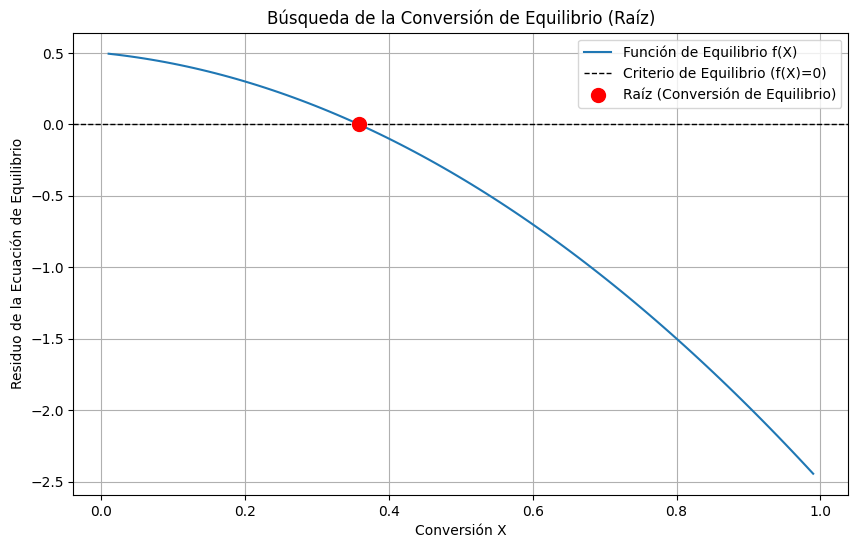

In [ ]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt



# --- 1. Definición de la Función de Equilibrio (f(X) = 0) ---
def ecuacion_de_equilibrio(X):

    """
    Función que calcula el residuo del balance de equilibrio.
    Buscamos X tal que esta función sea cero.
    """

    # --- 1.1. Definición de Parámetros ---
    C_A0 = 2.5 # mol/L
    K_eq = 0.5 # mol/L
    # X debe estar entre 0 y 1 para que tenga sentido físico
    if X <= 0 or X >= 1:
        # Retornamos un valor muy alto para castigar suposiciones fuera de los límites
        return 1e10

    # Simplificando la función:
    # K_eq * (1 - X) - (C_A0 * X**2) / (1 - X) = 0
    residuo = K_eq * (1.0 - X) - (C_A0 * X**2)
    return residuo

# --- 3. Optimización (Búsqueda de Raíz) ---
# X_inicial debe ser una suposición razonable entre 0 y 1 (ej. 0.5)
X_inicial = 0.5

resultado = root(
    ecuacion_de_equilibrio, # Función cuya raíz buscamos
    X_inicial               # Suposición inicial
)

X_eq = resultado.x[0]

# --- 4. Presentación de Resultados y Verificación ---
print("\n--- Simulación Estática No Lineal (Reactor Batch) ---")
print(f"Estado de la Solución: {'Éxito' if resultado.success else 'Fallo'}")
print(f"Conversión de Equilibrio (X_eq): {X_eq:.4f}")
print(f"Conversión en porcentaje: {X_eq * 100:.2f} %")

# Verificación de que la ecuación se cumple:
residuo_final = ecuacion_de_equilibrio(X_eq)
print(f"\nResiduo en el punto óptimo (debe ser ≈ 0): {residuo_final:.2e}")

# --- 5. Visualización para entender la No Linealidad ---
X_rango = np.linspace(0.01, 0.99, 100) # Rango de conversión de 1% a 99%
Residuo_rango = [ecuacion_de_equilibrio(X) for X in X_rango]

plt.figure(figsize=(10, 6))
plt.plot(X_rango, Residuo_rango, label='Función de Equilibrio f(X)')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Criterio de Equilibrio (f(X)=0)')
plt.scatter(X_eq, 0, color='red', s=100, zorder=5, label='Raíz (Conversión de Equilibrio)')

plt.title("Búsqueda de la Conversión de Equilibrio (Raíz)")
plt.xlabel("Conversión X")
plt.ylabel("Residuo de la Ecuación de Equilibrio")
plt.legend()
plt.grid(True)
plt.show()

# Ejercicios de práctica
---

## Simulación Estática LINEAL (Usar NumPy `np.linalg.solve`)

***Ejercicio 1: Mezclado de Tres Concentrados para una Base de Suero***

**Proceso:**  
Una planta cosmética mezcla tres concentrados (**A, B y C**) para producir una base de suero activa.  
Cada concentrado aporta principios activos clave (**Colágeno, Elastina y Glicerina**).  
Se requiere que la base de suero final cumpla con concentraciones exactas de estos tres activos.

---

Balance de Materia (Sistema de Ecuaciones Lineales)

Las variables a determinar son los **flujos volumétricos** de cada concentrado:  

V_A,  V_B, , V_C  en L/h


---

| **Ecuación** | **Expresión**                               | **Representa**             | **Lado Derecho (b)** |
|--------------|---------------------------------------------|-----------------------------|-----------------------|
| (1)          | 0.15V_A + 0.05V_B + 0.00V_C = 40           | Flujo total de Colágeno     | 40 g/h               |
| (2)          | 0.05V_A + 0.10V_B + 0.05V_C = 30           | Flujo total de Elastina     | 30 g/h               |
| (3)          | 0.00V_A + 0.05V_B + 0.15V_C = 20           | Flujo total de Glicerina    | 20 g/h               |

---
**Calcular el flujo volumétrico total de la base de suero producida por hora.**

***Ejercicio 2: Asignación de Costos en Intercambiadores de Calor del Carrusel***

**Proceso:**  
El sistema de enfriamiento de un carrusel tiene dos intercambiadores de calor (**IC-1 y IC-2**) que operan en serie.  
Los flujos de calor transferidos (**Q₁ y Q₂**) deben ser balanceados con la energía de entrada (**vapor Eᵥ**) y la energía perdida (**enfriamiento E𝑐**).

---

 Balance de Energía (Sistema de Ecuaciones Lineales)

Las variables a determinar son:  

Q_1,  Q_2,  E_v en kW


---

Ecuaciones en forma tabular

| **Ecuación** | **Expresión**                              | **Representa**                        | **Lado Derecho (b)** |
|--------------|--------------------------------------------|----------------------------------------|-----------------------|
| (1)          | 1.0Q₁ + 0.5Q₂ + 0.1Eᵥ = 150               | Balance de la Sección 1                | 150 kW               |
| (2)          | 0.2Q₁ + 1.0Q₂ − 0.0Eᵥ = 80                | Balance de la Sección 2                | 80 kW                |
| (3)          | 0.1Q₁ − 0.1Q₂ + 1.0Eᵥ = 10                | Restricción de eficiencia del sistema   | 10 kW                |


**Calcular el el requerimiento de energía de vapor**


## Simulación Estática NO LINEAL (Usar SciPy `optimize.root` o `optimize.minimize`)

***Ejercicio 3: Reactor Batch - Equilibrio de Esterificación (Raíz)***

**Proceso:**  
Se lleva a cabo la esterificación reversible:

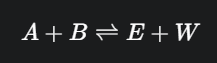

El balance de masa en el equilibrio se puede formular en términos de la **conversión de equilibrio** \(X\) (conversion del reactivo limitante A). Asumiendo que las concentraciones iniciales de \(E\) y \(W\) son cero, la constante de equilibrio \(K_c\) cumple:

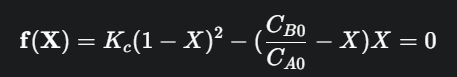



---

**Datos**:

C
A0
​
  (Concentración inicial de A) = 1.0 mol/L

C
B0
​
  (Concentración inicial de B) = 1.2 mol/L

Kc  (Constante de equilibrio) = 4.0


Utilizar scipy.optimize.root con una suposición inicial de Xguess = 0.6
para encontrar la conversión de equilibrio Xeq.




***Ejercicio 4: Optimización del pH Final de un Producto (Minimización de Costos)***

**Proceso:** Se busca la cantidad óptima de agente neutralizante (N en kg) a añadir para minimizar el Costo Total de producción (Ctotal​), ya que usar muy poco o demasiado agente neutralizante genera altos costos de penalización por calidad.

**Función de Costo (a Minimizar):**

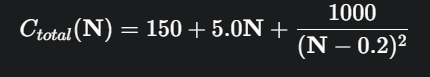



**Restricciones:**

-   La cantidad de neutralizante N debe ser mayor o igual a 0.3 kg.

**Objetivo:**

1.  Definir la función **Ctotal​(N)** en Python.

2.  Utilizar **`scipy.optimize.minimize`** con la restricción de límite inferior N ≥ 0.3 kg para encontrar la cantidad óptima Nopt​.

3.  Interpretar el costo de penalización si se intenta operar en el límite inferior (N=0.2 kg).

4.  Graficar la función de costo para validar visualmente el punto óptimo.